### En base a nuestros Datos y al interes de la empresa, queremos observar como se relaciona la cantidad vendida con la utilidad o ganancia real que tendremos, ya que esta puede verse afectada por diversos motivos, como la variacion del tipo de cambio, costos de envíos, inflación entre otros.
### Vamos a proponer un modelo de regresión linear simple para ver si este modelo puede explicar la variacion de la utilidad bruta con respecto a la cantidad vendida

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

In [3]:
# importamos los datos

df = pd.read_csv("datosLimpios.csv")
df.head()

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
0,Argentina,Representante,Mayorista,Mascotas,Juguetes,Anitibyx armatus,2019.0,C1 2019,155040.02,15562,41.19,63864.63,91175.39
1,Argentina,Mail,De proximidad,Mascotas,Juguetes,Sarcorhamphus papa,2019.0,C1 2019,144314.49,1534,57.57,83084.42,61230.07
2,Argentina,Teléfono,Grandes Almacenes,Infantil,Calzado,Oreamnos americanus,2019.0,C1 2019,114380.59,4036,57.42,65680.44,48700.15
3,Argentina,Website,Especializado,Hombre,Calzado,Zosterops pallidus,2019.0,C1 2019,144097.85,991,27.39,39475.34,104622.51
4,Argentina,Website,Especializado,Adultos,Vestimenta,Dusicyon thous,2019.0,C1 2019,110570.62,4679,68.42,75654.42,34916.20


In [4]:
#cambiamos el nombre de utilidad_bruta por utilidad, ya que no es la utilidad bruta
df.rename(columns={'utilidad_bruta': 'utilidad'}, inplace=True)
df

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad,costos
0,Argentina,Representante,Mayorista,Mascotas,Juguetes,Anitibyx armatus,2019.0,C1 2019,155040.02,15562,41.19,63864.63,91175.39
1,Argentina,Mail,De proximidad,Mascotas,Juguetes,Sarcorhamphus papa,2019.0,C1 2019,144314.49,1534,57.57,83084.42,61230.07
2,Argentina,Teléfono,Grandes Almacenes,Infantil,Calzado,Oreamnos americanus,2019.0,C1 2019,114380.59,4036,57.42,65680.44,48700.15
3,Argentina,Website,Especializado,Hombre,Calzado,Zosterops pallidus,2019.0,C1 2019,144097.85,991,27.39,39475.34,104622.51
4,Argentina,Website,Especializado,Adultos,Vestimenta,Dusicyon thous,2019.0,C1 2019,110570.62,4679,68.42,75654.42,34916.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11933,Uruguay,Website,Hipermercado,Mascotas,Accesorios,Sciurus vulgaris,2021.0,C4 2021,173752.28,7249,57.33,99610.76,74141.52
11934,Uruguay,Especial,Especializado,Infantil,Juguetes,Eubalaena australis,2021.0,C4 2021,101345.37,13210,54.99,55727.08,45618.29
11935,Venezuela,Website,Grandes Almacenes,Infantil,Calzado,Colaptes campestroides,2021.0,C4 2021,101967.41,10356,61.16,62365.65,39601.76
11936,Venezuela,Teléfono,Especializado,Mujer,Juguetes,Chordeiles minor,2021.0,C4 2021,105556.48,9532,43.85,46283.85,59272.63


In [5]:
# Ahora filtramos el dataset con los datos que vamos a analizar
datos = df[['cantidad','utilidad']]
datos.head()

,cantidad,utilidad
0,15562,63864.63
1,1534,83084.42
2,4036,65680.44
3,991,39475.34
4,4679,75654.42


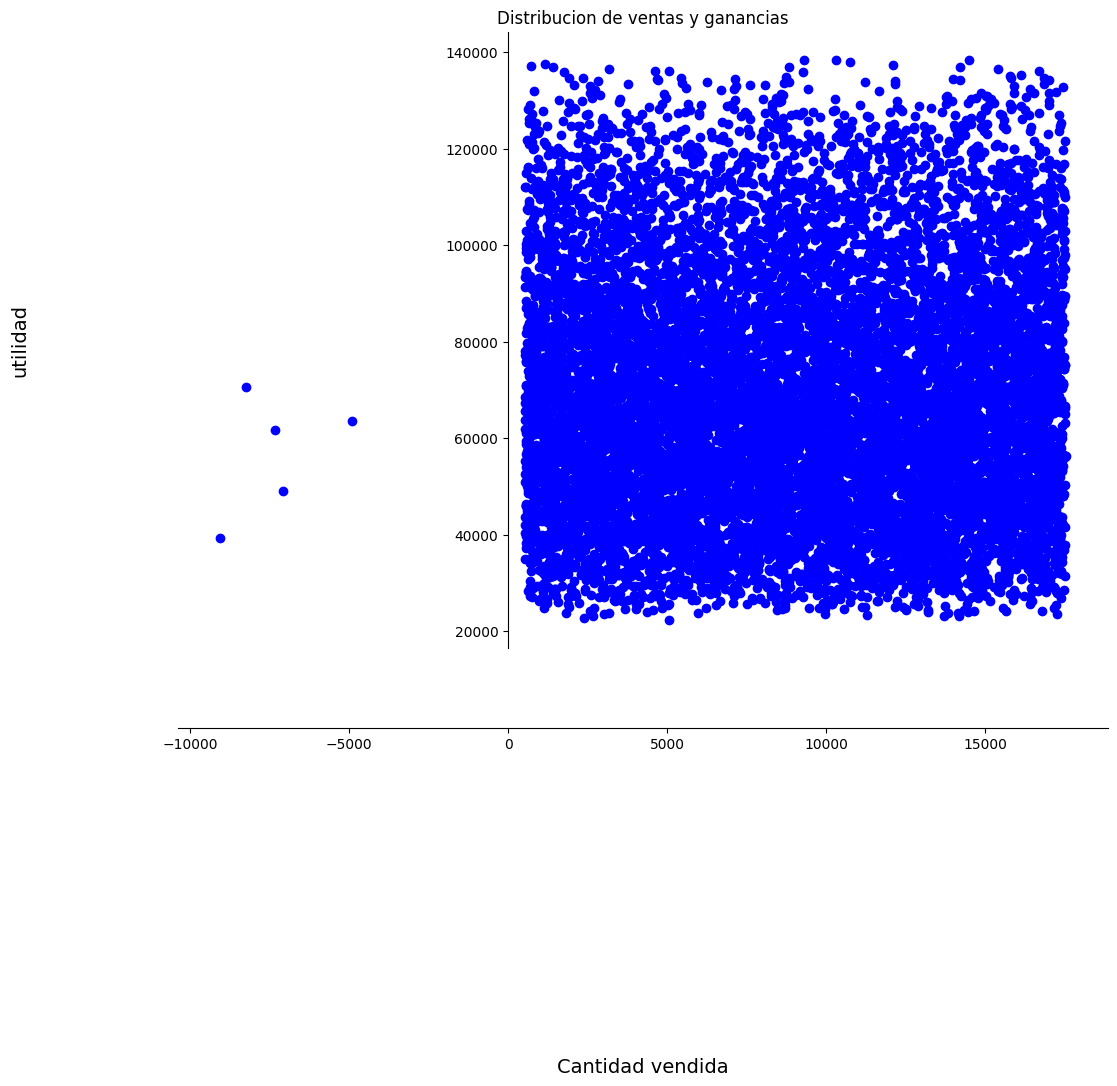

In [8]:
#Presentamos los datos con un diagrama de dispersion para poder ver si vemos alguna relación
#Nota lo hacemos con Axes para ajustar los ejes.
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(datos['cantidad'], datos['utilidad'], color ='blue')
ax.spines['left'].set_position(('data',0)) #muevo el eje y al centro
ax.spines['bottom'].set_position(('data',0)) #muevo el eje x al centro
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel('Cantidad vendida', fontsize = 14, labelpad = 220)
ax.set_ylabel('utilidad',fontsize = 14, labelpad = 300)
ax.set_title('Distribucion de ventas y ganancias')
plt.show()

#### Al tener una gran cantidad de datos vemos una dispersion muy homogenea, en principio parecería que no estamos en presencia de una relación lineal pero vamos a insistir con el modelo de regresión para analizar los resultados.

### Para nuestro modelo el predictor será: <table><tr><td>cantidad</td></tr></table> 
### y la variable de respuesta: <table><tr><td>utilidad</td></tr></table>

In [10]:
# dividimos los datos en train y test
X = datos[['cantidad']]
y = datos['utilidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123, shuffle= True)

#creación del modelo:
modelo = LinearRegression()
#entrenamos el modelo:
modelo.fit(X = X_train, y = y_train)

LinearRegression()

### Explicacion:
#### Dividimos los datos en "X = datos[['cantidad']]" aca seleccionamos la columna datos y al estar dentro del corchete se crea un DataFrame con una sola columna con la variable independiente.
#### y = datos['UTILIDAD'] selecciona la columna 'UTILIDAD' como la variable dependiente o 'Target'
#### train_test_split() divide los datos en dos partes; un conjunto de entrenamiento (X_train, y_train) y un conjunto de prueba (X_test, y_test )
#### train_size = 0.8 quiere decir q el 80% de los datos se utilizan para entrenar el modelo y el 20% restante para probarlo.
#### random_state = 123 crea una semilla para generar numeros aleatorios que aseguran q la division sea reproducible. si se cambia o no se indica, la division podria ser diferente en cada ejecución.
#### shuffle = True Nos dice que los datos se mezclaran antes de la división que es útil para evitar algun patron no deseado en los datos.


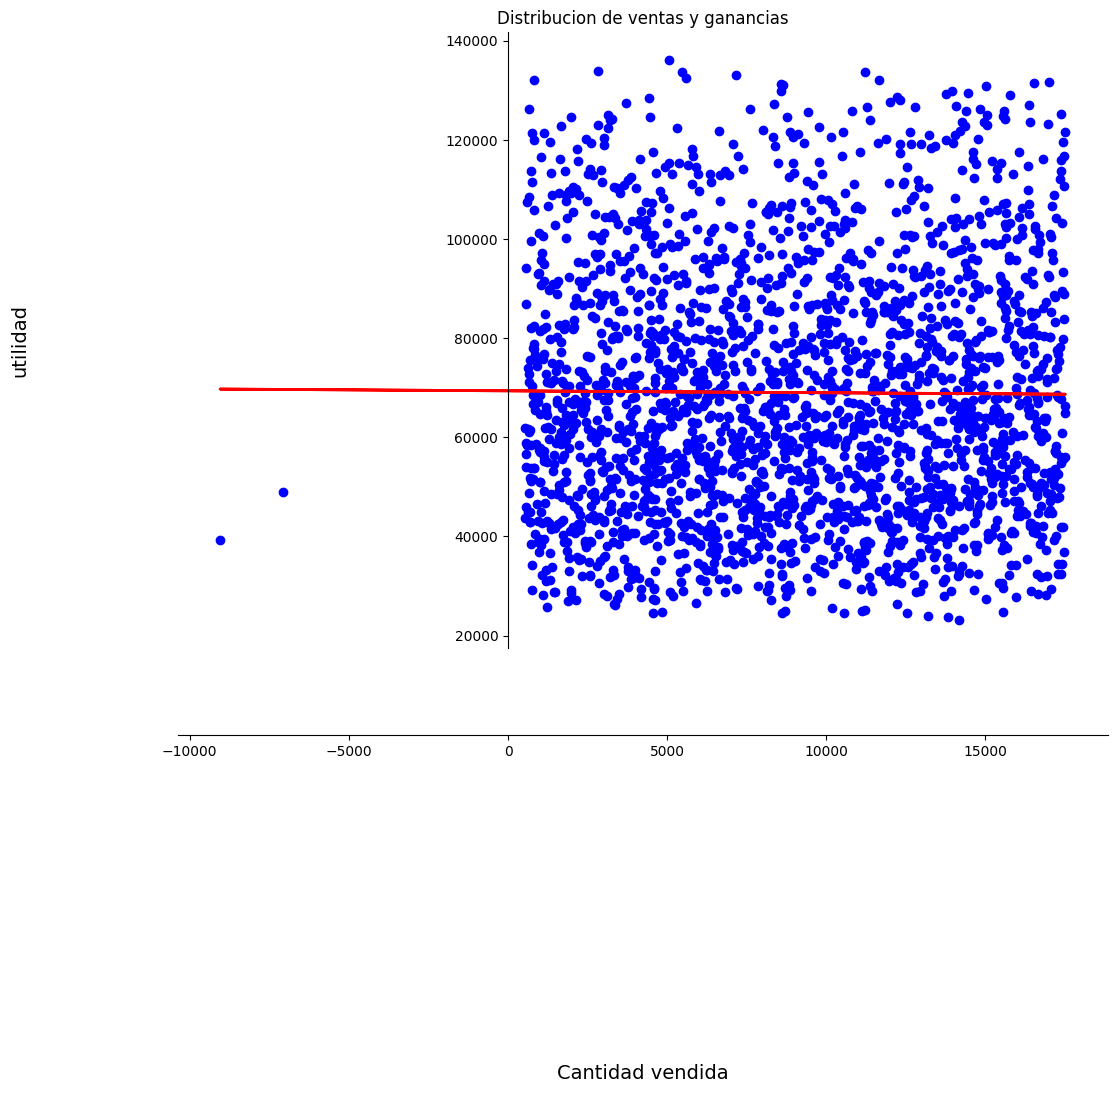

In [11]:
# Realizamos predicciones y graficamos
y_predecida = modelo.predict(X_test)

# graficamos

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test,y_test, color ='blue', label='Datos Reales')
ax.plot(X_test, y_predecida, color = 'red', linewidth = 2, label = 'Predicciones')
ax.spines['left'].set_position(('data',0)) #muevo el eje y al centro
ax.spines['bottom'].set_position(('data',0)) #muevo el eje x al centro
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel('Cantidad vendida', fontsize = 14, labelpad = 220)
ax.set_ylabel('utilidad',fontsize = 14, labelpad = 300)
ax.set_title('Distribucion de ventas y ganancias')
plt.show()




### Claramente estos datos no se ajustan por un modelo de regresión lineal, pero vamos a seguir evaluando el modelo para ver si el SRME, MAE Y R2 nos asevera esto.

In [12]:
# Información del modelo
#==============================================================
print(f"Intercepto B0: {modelo.intercept_}")
print(f"Coeficiente B1-pendiente-:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de Determinación R^2:", modelo.score(X,y))

Intercepto B0: 69389.61543460903
Coeficiente B1-pendiente-: [('cantidad', -0.03901012412612513)]
Coeficiente de Determinación R^2: -0.0001087935679919827


### Vemos que el intercepto es 69389.61 y la pendiente practicamente nula, -0.0390 a su vez, el coeficiente de determinación nos dice que la proporcion de variacion de y que se explica por la relación lineal entre x e y (por el modelo) es de -0.0001087935.. es decir El modelo de regresión lineal no explica la variación de estos datos.

### Veamos ahora que nos dice el error cuadratico medio y el error medio absoluto

In [13]:
mse = mean_squared_error(y_test, y_predecida)
mae = mean_absolute_error(y_test, y_predecida)
print(f"Error cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático Medio (MSE): 617272380.3074948
Error Absoluto Medio (MAE): 20526.699500268318


### El error es enorme justamente porque el modelo no se ajusta a los datos.

### Solo para comparar usaremos  Statsmodels ya que un poco mas completa que Scikitlearn y podemos ver la bondad de ajuste, y otros estadísticos.

In [14]:
# dividimos los datos en train y test
X = datos[['cantidad']]
y = datos['utilidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123, shuffle= True)

In [15]:
X_train = sm.add_constant(X_train, prepend = True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               utilidad   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5687
Date:                Sat, 26 Oct 2024   Prob (F-statistic):              0.451
Time:                        17:22:21   Log-Likelihood:            -1.1019e+05
No. Observations:                9550   AIC:                         2.204e+05
Df Residuals:                    9548   BIC:                         2.204e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e+04    530.423    130.819      0.0

### En este caso el coeficiente de determinacion es 0 con eso ya sabemos que el modelo no explica la variabilidad de la variable respuesta. El F-static sería el valor del estadistico que calculamos para ver si rechazo o no la hipotesis nula en el caso de la regresión. Vemos que la significación del valor F es de 0.451. si nuestra región crítica o nivel de significancia α =0.05 vemos el valor de significancia de F es mas grande por lo tanto deberiamos aceptar la H0 y decir que el modelo no ajusta.
### es decir: Ho: β1 =0 --> la aceptamos 
###                 H1: β1 ≠0

### A pesar de ya sabemos que este modelo no explica nuestras variables, la ecuación del modelo de regresion lineal quedaría:
### UTILIDAD = 69389.61 + -0.0390*CANTIDAD

### Veamos ahora la Correlación

### Vamos a realizar una matriz de correlación entre los datos de nuestro dataframe

In [16]:
dataCorr = df.iloc[:, 8:]
dataCorr

,ventas,cantidad,utilidad_bruta_p,utilidad,costos
0,155040.02,15562,41.19,63864.63,91175.39
1,144314.49,1534,57.57,83084.42,61230.07
2,114380.59,4036,57.42,65680.44,48700.15
3,144097.85,991,27.39,39475.34,104622.51
4,110570.62,4679,68.42,75654.42,34916.20
...,...,...,...,...,...
11933,173752.28,7249,57.33,99610.76,74141.52
11934,101345.37,13210,54.99,55727.08,45618.29
11935,101967.41,10356,61.16,62365.65,39601.76
11936,105556.48,9532,43.85,46283.85,59272.63


In [17]:
matriz = dataCorr.corr()
print(matriz)

                    ventas  cantidad  utilidad_bruta_p  utilidad    costos
ventas            1.000000 -0.010105          0.002890  0.546763  0.545998
cantidad         -0.010105  1.000000          0.006132  0.000516 -0.011917
utilidad_bruta_p  0.002890  0.006132          1.000000  0.820883 -0.818105
utilidad          0.546763  0.000516          0.820883  1.000000 -0.395932
costos            0.545998 -0.011917         -0.818105 -0.395932  1.000000


### teniendo en cuenta que el coeficiente de correlación varía entre:  -1<r<1 podemos ver como se relacionan las distintas variables, obviamente entre la misma variable la correlación será de 1.
### EN ESTE CASO LOS DATOS SON MAYORMENTE DE LA UTILIDAD EXPRESADA EN DIFERENTES FORMAS POR ESO EN ALGUNOS CASOS ESTAN FUERTEMENTE RELACIONADOS, TAL VEZ PODRÍAMOS HABER ELEGIDO QUE RELACIÓN HAY ENTRE COSTOS Y UTILIDAD Y HUBIERAMOS TENIDO QUIZÁ UN MODELO DE REGRESIÓN QUE SE AJUSTARA MEJOR A LOS DATOS

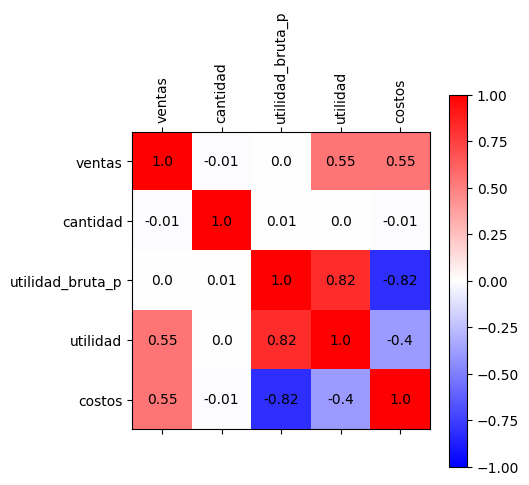

In [19]:
# grafico de la matriz de correlación

plt.matshow(matriz, cmap = "bwr", vmin = -1, vmax = 1)

plt.xticks(range(5), dataCorr.columns, rotation = 90)
plt.yticks(range(5), dataCorr.columns)

for i in range (len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i,j],2), ha = "center", va = "center")

plt.colorbar()
plt.show()

### Vemos que la utilidad y costos estan relacionados en manera negativa es decir cuando aumentan los costos disminuye la utilidad. A su vez tambien tenemos una correlación entre ventas y utilidad, mientras aumentan las ventas aumenta la utilidad. tal vez deberíamos haber hecho un analisis de regresion lineal sobre estas variables. Aunque esto no quiere decir que tengan una relación lineal.

### CONCLUSIONES
#### En nuestro caso y con las Variables elegidas. Claramente estos datos no se ajustan por un modelo de regresión lineal. Vimos que el intercepto es 69389.61 y la pendiente practicamente nula, -0.0390 a su vez, el coeficiente de determinación, nos dice que la proporción de variacion de y que se explica por la relación lineal entre x e y (por el modelo) es de 0.000.. es decir El modelo de regresión lineal no explica la variación de estos datos. A su vez Error cuadrático Medio (MSE): 617272380.30 y el Error Absoluto Medio (MAE):20526.69 "SON MUY GRANDES" Y para concluir vemos los datos que nos arroja Statsmodels en los cuales tenemos las prubas de hipotesis en donde, El F-static sería el valor del estadistico que calculamos para ver si rechazo o no la hipotesis nula en el caso de la regresión. Vemos que la significación del valor F es de 0.451. si nuestra región crítica o nivel de significancia α =0.05 vemos el valor de significancia de F es mas grande por lo tanto deberiamos aceptar la H0 y decir que el modelo no ajusta.¶

### Regresión Lineal Múltiple

#### Al Observar la correlación que hay entre nuestras variables, vemos, que la que mas destaca para nuestro analisis de tratar de ver, que variable explica mejor la utilidad, son los costos. Variables como utilidad_bruta y utilidad_bruta_p son practicamente lo mismo que la variable UTILIDAD, o estan estrechamente relacionadas por lo tanto serían redundantes para nuestro análisis. Entonces las variables que tienen una mayor relación con la utilidad son la cantidad (r = 0,01) y los costos (r = - 0.84)

### Ajuste del modelo

#### por lo explicado en el párrafo anterior ajustaremos el modelo utilizando las variables predictoras 'ventas' y 'costos'

In [17]:
### creamos el dataset con los datos necesarios para el analisis


In [20]:
datos_reg_multi = df[['ventas','costos','utilidad']]
datos_reg_multi.head()

,ventas,costos,utilidad
0,155040.02,91175.39,63864.63
1,144314.49,61230.07,83084.42
2,114380.59,48700.15,65680.44
3,144097.85,104622.51,39475.34
4,110570.62,34916.20,75654.42


In [21]:
# Separamos las variables predictoras y de respuesta y hacemos el split de datos 'train' y 'test'

X = datos_reg_multi[['ventas', 'costos']]
y = datos_reg_multi['utilidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123, shuffle= True)

# Creamos el modelo de regresión lineal
regresion_multiple = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento.
regresion_multiple.fit(X_train, y_train)

LinearRegression()

In [22]:
# Realizamos las predicciones con los datos de prueba
y_pred = regresion_multiple.predict(X_test)

In [23]:
# Calculamos el coeficiente de determinación R^2 y el error cuadrático medio (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Coeficiente de determinación R^2: {}'.format(r2))
print('Error cuadrático medio (MSE): {}'.format(mse))

Coeficiente de determinación R^2: 0.9941803184199202
Error cuadrático medio (MSE): 3586569.681669907


### Vemos que con agregar un predictor que tiene una fuerte correlación el modelo ya empieza a ajustar.

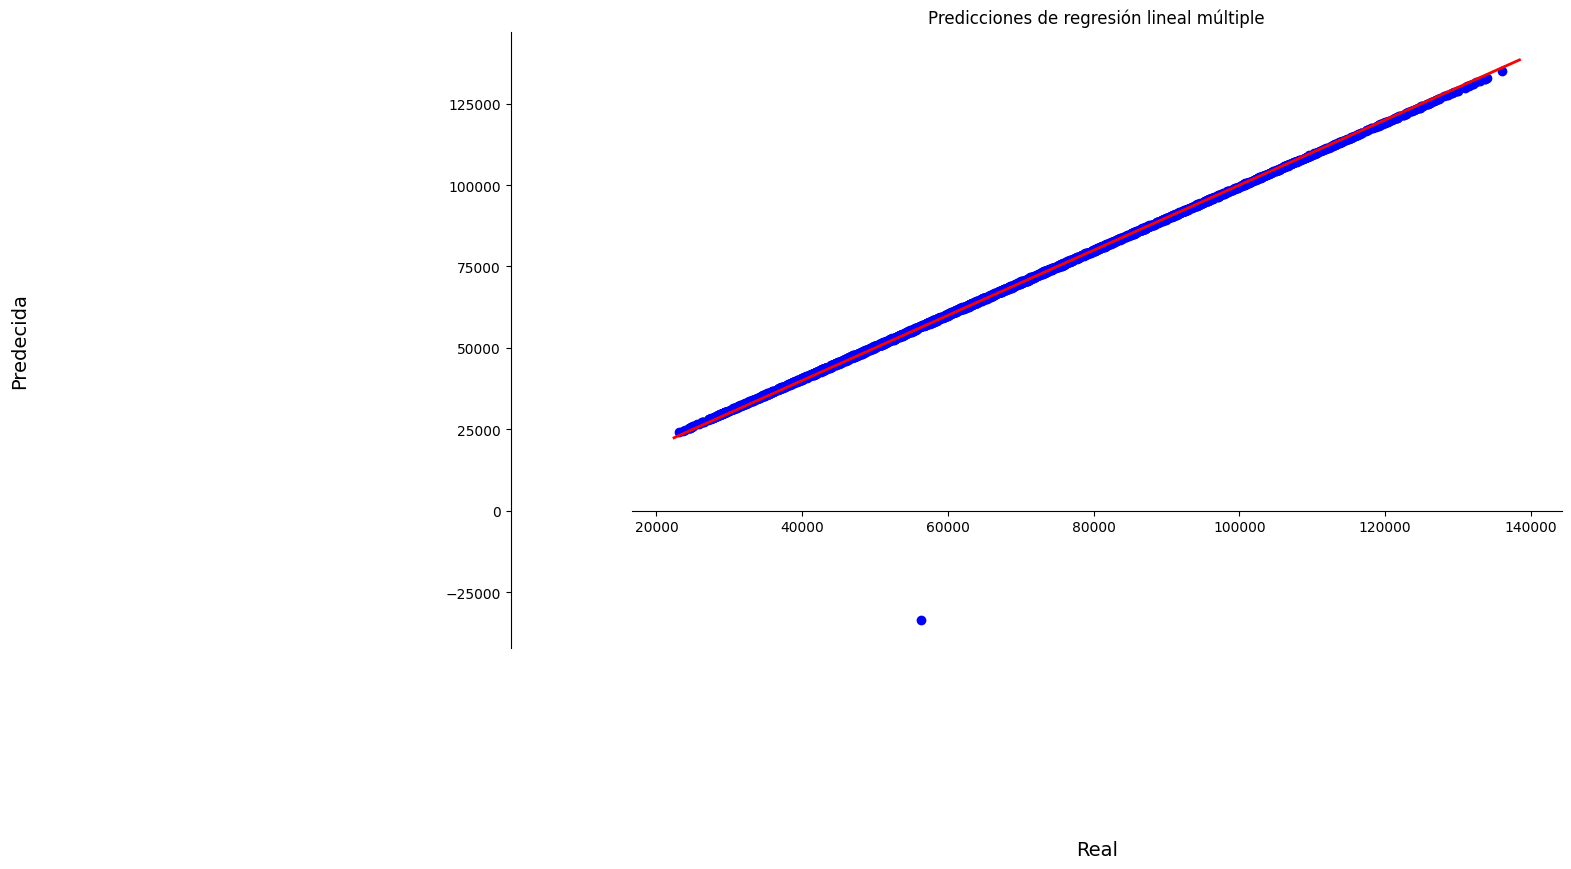

In [26]:
#Visualización real vs predecido
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred, color ='blue', label='Datos Reales')
ax.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], color = 'red', linewidth = 2, label = 'Predicciones')
ax.spines['left'].set_position(('data',0)) #muevo el eje y al centro
ax.spines['bottom'].set_position(('data',0)) #muevo el eje x al centro
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel('Real', fontsize = 14, labelpad = 220)
ax.set_ylabel('Predecida',fontsize = 14, labelpad = 300)
ax.set_title('Predicciones de regresión lineal múltiple')
plt.show()

### Nota, la recta es de referencia, toma desde los valores minimos de entrenamiento hasta los maximos y representa los casos donde el valor predicho es el mismo que el valor real. (No es la recta de minimos cuadrados)

### Veamos los datos que nos arroja el Statsmodels:

In [27]:
X_train = sm.add_constant(X_train, prepend = True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               utilidad   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.942e+05
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:38:39   Log-Likelihood:                -90435.
No. Observations:                9550   AIC:                         1.809e+05
Df Residuals:                    9547   BIC:                         1.809e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1869.5343    164.957     11.333      0.0

### Vemos que con introducir predictores que tiene una fuerte correlacion con utilidad el modelo ya ajusta mejor, en este caso el coeficiente de determinación R^2 nos dice que el 98,4%  de la variación de los datos es explicada por el modelo. viendo la probabilidades de t, observamos que el predictor "ventas" tiene una significancia de 0.000 es decir menor al 0.05 del nivel de significancia al igual que el predictor costos. Esta vez las variables son extremadamentes significativas y si explican la variacion de la utilidad.

### CONCLUSIONES

### Nuestro modelo de regresión lineal multiple queda: 

### UTILIDAD = 1869.53 + 0.9805Ventas - 0.9871Costos

### El cuál es capaz de explicar el 98,4% de la variabilidad en la utilidad del negocio. a su vez el F-test nos dice que el modelo es significativo ya que el p-value (Prob (F-statistic)) es 0 o muy cercano a 0

In [49]:
X = datos_reg_multi[['ventas', 'costos']]
y = datos_reg_multi['utilidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 4, shuffle= True)

#creación del modelo:
modelo = LinearRegression()
#entrenamos el modelo:
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [46]:
datos_prueba = {'ventas': [200000,150000.78,175238.48,38512.12], 'costos': [111359.89,98256.21,85412.63,12569.85]}

In [47]:
df_prueba = pd.DataFrame(datos_prueba)

In [48]:
df_prueba

,ventas,costos
0,200000.00,111359.89
1,150000.78,98256.21
2,175238.48,85412.63
3,38512.12,12569.85


In [50]:
df_prueba['utilidad_predicha'] = modelo.predict(df_prueba[['ventas', 'costos']])

In [ ]:
datos_reg_multi['utilidad_predicha'] = modelo.predict(datos_reg_multi[['ventas', 'costos']])

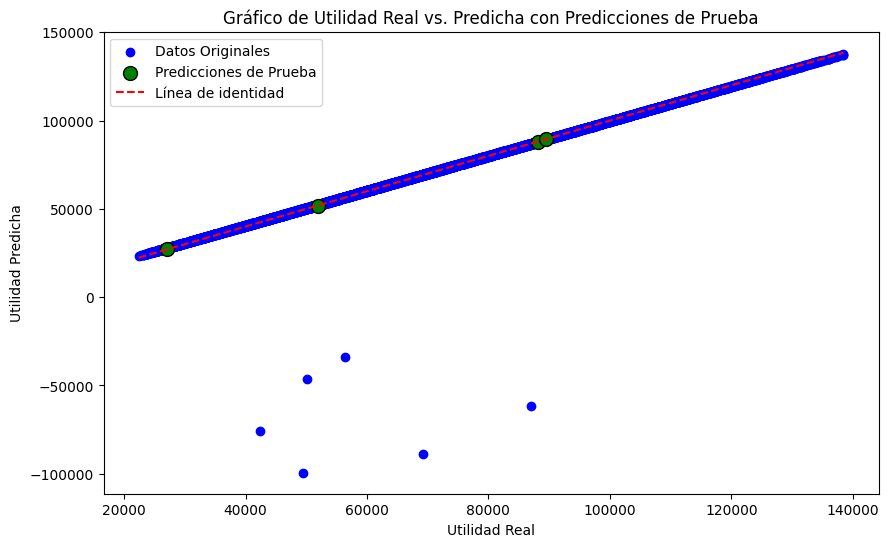

In [56]:

plt.figure(figsize=(10, 6))


plt.scatter(datos_reg_multi['utilidad'], datos_reg_multi['utilidad_predicha'], color='blue', label='Datos Originales')

# Agregamos las predicciones del DataFrame de prueba resaltadas
plt.scatter(df_prueba['utilidad_predicha'], df_prueba['utilidad_predicha'], color='green', edgecolor='black', s=100, label='Predicciones de Prueba')

# Línea de identidad
plt.plot([datos_reg_multi['utilidad'].min(), datos_reg_multi['utilidad'].max()],
         [datos_reg_multi['utilidad'].min(), datos_reg_multi['utilidad'].max()],
         color='red', linestyle='--', label='Línea de identidad')


plt.xlabel("Utilidad Real")
plt.ylabel("Utilidad Predicha")
plt.title("Gráfico de Utilidad Real vs. Predicha con Predicciones de Prueba")
plt.legend()
plt.show()

### Al hacer una prueba a mano vemos que bien ajusta el modelo

### Conclusiones

### En principio y al no saber como estaban relacionadas las variables elejimos variables que no tenian correlacion y en consecuencia a esto la regresión lineal no nos definia nada. luego de interpretar la matriz de correlación y ver que habia variables que podían ser buenas candidatas como predictoras en un modelo de regresión lineal multiple, al utilizarlas vimos como todo cambió y el modelo pasó de explicar practicamente el 0 % al 98 % de la variabibiladad de los datos, ademas de tener un bajo margen de error.
### Para finalizar queríamos hacer incapié en la importancia de comprender como se relacionan los datos entre si. y la naturaleza de los mismos, ya que al comienzo de este trabajo al no entender bien los mismos y como se relacionaban tuvimos muy malos resultados en cuanto al ajuste del modelo de regresión lineal. Una vez resuleto ese problema pudimos obtener un modelo de regresión multiple en el cual podemos explicar la variabilidad de la utilidad a medida que los predictores 'ventas' y 'costos' cambian.